# Train data 전처리 

## 1) Importing libraries & dataset

드라이브 마운트만 숨겨진 셀 클릭해서 들어가셔야 하고 <br>
나머지는 한 번에 돌려주세요.

#### (1) importing libraries - 한 번에 통째로 클릭

In [1]:
!git clone https://github.com/kakao/khaiii.git
!pip install cmake
!mkdir build
!cd build && cmake /content/khaiii
!cd /content/build/ && make all
!cd /content/build/ && make resource
!cd /content/build && make install
!cd /content/build && make package_python
!pip install /content/build/package_python

Cloning into 'khaiii'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 957 (delta 25), reused 49 (delta 19), pack-reused 877
Receiving objects: 100% (957/957), 33.03 MiB | 26.51 MiB/s, done.
Resolving deltas: 100% (383/383), done.
-- [hunter] Initializing Hunter workspace (70287b1ffa810ee4e952052a9adff9b4856d0d54)
-- [hunter]   https://github.com/ruslo/hunter/archive/v0.23.34.tar.gz
-- [hunter]   -> /root/.hunter/_Base/Download/Hunter/0.23.34/70287b1
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-

In [2]:
from khaiii import KhaiiiApi
import pandas as pd
import numpy as np
import re

#### (2) 드라이브 마운트 - 공유드라이브에서 데이터셋 불러옵니다. 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
X_train=pd.read_csv("/content/drive/Shareddrives/20-2 KUBIG 자연어처리 프로젝트/최종 트레이닝데이터/x_train.csv")
y_train=pd.read_csv("/content/drive/Shareddrives/20-2 KUBIG 자연어처리 프로젝트/최종 트레이닝데이터/y_train.csv")

#### (3) 데이터 확인하고, 나누어서 저장합니다

In [5]:
X_train.head()

,Unnamed: 0,document
0,0,평점에 스포 달린 영화는 무조건 점
1,1,재밌습니다 잘 만든 영화라는
2,2,딱 점
3,3,만남과 헤어짐 그리고 재회
4,4,롱기스트 야드를 먼저 봐서 그런지 진짜 쓰레기 특히 주인공 진짜 맘에 안 든다


#### (4) 형태소 분석기 돌리기 

In [6]:
api = KhaiiiApi()

In [7]:
significant_tags = ['NNG', 'NNP', 'NNB', 'VV', 'VA', 'VX', 'MAG', 'MAJ', 'XSV', 'XSA']

In [8]:
def pos_text(texts):
    corpus = []
    for sent in texts:
        pos_tagged = ''
        for word in api.analyze(sent):
            for morph in word.morphs:
                if morph.tag in significant_tags:
                    pos_tagged += morph.lex + '/' + morph.tag + ' '
        corpus.append(pos_tagged.strip())
    return corpus

In [9]:
tagged_corpus=pos_text(X_train["document"])

In [10]:
p1 = re.compile('[가-힣A-Za-z0-9]+/NN. [가-힣A-Za-z0-9]+/XS.')
p2 = re.compile('[가-힣A-Za-z0-9]+/NN. [가-힣A-Za-z0-9]+/XSA [가-힣A-Za-z0-9]+/VX')
p3 = re.compile('[가-힣A-Za-z0-9]+/VV')
p4 = re.compile('[가-힣A-Za-z0-9]+/VX')

## 2) preprocessing - 정규화 등

In [11]:
def stemming_text(text):
    corpus = []
    for sent in text:
        ori_sent = sent
        mached_terms = re.findall(p1, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            modi_terms += '다/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)
        
        mached_terms = re.findall(p2, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                if tag != 'VX':
                    modi_terms += lemma
            modi_terms += '다/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)

        mached_terms = re.findall(p3, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            if '다' != modi_terms[-1]:
                modi_terms += '다'
            modi_terms += '/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)

        mached_terms = re.findall(p4, ori_sent)
        for terms in mached_terms:
            ori_terms = terms
            modi_terms = ''
            for term in terms.split(' '):
                lemma = term.split('/')[0]
                tag = term.split('/')[-1]
                modi_terms += lemma
            if '다' != modi_terms[-1]:
                modi_terms += '다'
            modi_terms += '/VV'
            ori_sent = ori_sent.replace(ori_terms, modi_terms)
        corpus.append(ori_sent)
    return corpus

In [12]:
stemming_corpus = stemming_text(tagged_corpus)

In [13]:
for i in range(0, 30):
    print(stemming_corpus[i])

평점/NNG 스포/NNG 달리다/VV 영화/NNG 무조건/MAG 점/NNG
재미있/VA 잘/MAG 만들다/VV 영화/NNG
딱/MAG 점/NNG
만남/NNG 헤어지다/VV 그리고/MAJ 재회/NNG
롱/NNG 기스트/NNP 야/NNG 드/NNP 먼저/MAG 보다/VV 그렇/VA 진짜/NNG 쓰레기/NNG 특히/MAG 주인공/NNG 진짜/NNG 맘/NNG 안/MAG 들다/VV
오늘/NNG 고지전/NNG 다시/MAG 보다/VV 나라/NNG 위하다/VV 휴전/NNG 직전/NNG 싸우다/VV 전사하다/VV 참전/NNG 용사/NNG 감사/NNG 드다/VV 리/XSV
술/NNG 담배/NNG 더/MAG 해롭/VA 것/NNB 막장/NNG 드라마/NNG
정말/MAG 좋/VA 특히/MAG 영상/NNG 음악/NNG
ㅡ/NNP
예고편/NNG 낚이다/VV 최악/NNG 영화/NNG 중/NNB
현실/NNG 재밌/VA
하/XSA 영화/NNG 만들다/VV 내다/VV 수/NNB 없/VA 구로/NNP 사와/NNG 재능/NNG
우/MAG 굳ㅋ/MAG 재미/NNG 있/VA
쩌르다/VV 진짜/MAG 국영/NNG 형/NNG 최고/NNG
쓰레기/NNG 영화/NNG 다/MAG 있다/VV 인물/NNG 관계/NNG 정리/NNG 안/MAG 하다/VV 주다/VV 줄거리/NNG 없/VA 내용/NNG ㅉ/NNG
무섭/VA 오페라/NNG 유령/NNG 프레데/NNP 터/NNG
결혼하다/VV 보다/VV 미혼/NNG 때/NNG 또/MAG 감동/NNG 받다/VV 영화/NNG
캐서린/NNP 제타/NNG 존스/NNP 보톡스/NNG 자연스럽다/VV 영화/NNG 마치/MAG 전성기/NNG 훨씬/MAG 지나다/VV 톱스타/NNG 뒤늦/VA 공연/NNG 하다/VV 듯하다/VV 느낌/NNG 마디/NNG 철/NNG 지나다/VV 급/NNG 액션/NNG
이상하다/VV 것/NNB 만들다/VV 것/NNB 왠지/MAG 시간/NNG 지나다/VV 허접하다/VV 지다/VV
드라마/NNG 재밌/VA 보다/VV 것/NNB 없/VA 것/NNB 같/VA 구다

In [14]:
def text_cleaning(text):
   hangul=re.compile("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]+")
   result=hangul.sub('', text)
   return result

In [15]:
for sent in stemming_corpus:
  map(text_cleaning, sent)

In [16]:
corpus=[]
for i in range(0, len(stemming_corpus)):
  corpus.append(text_cleaning(stemming_corpus[i]))

In [17]:
clean_corpus=corpus

In [18]:
corpus=[]
for sent in clean_corpus:
  corpus.append(sent.split())

In [19]:
corpus_comma=corpus

In [20]:
for i in range(0, 30):
    print(corpus_comma[i])

['평점', '스포', '달리다', '영화', '무조건', '점']
['재미있', '잘', '만들다', '영화']
['딱', '점']
['만남', '헤어지다', '그리고', '재회']
['롱', '기스트', '야', '드', '먼저', '보다', '그렇', '진짜', '쓰레기', '특히', '주인공', '진짜', '맘', '안', '들다']
['오늘', '고지전', '다시', '보다', '나라', '위하다', '휴전', '직전', '싸우다', '전사하다', '참전', '용사', '감사', '드다', '리']
['술', '담배', '더', '해롭', '것', '막장', '드라마']
['정말', '좋', '특히', '영상', '음악']
['ㅡ']
['예고편', '낚이다', '최악', '영화', '중']
['현실', '재밌']
['하', '영화', '만들다', '내다', '수', '없', '구로', '사와', '재능']
['우', '굳ㅋ', '재미', '있']
['쩌르다', '진짜', '국영', '형', '최고']
['쓰레기', '영화', '다', '있다', '인물', '관계', '정리', '안', '하다', '주다', '줄거리', '없', '내용', 'ㅉ']
['무섭', '오페라', '유령', '프레데', '터']
['결혼하다', '보다', '미혼', '때', '또', '감동', '받다', '영화']
['캐서린', '제타', '존스', '보톡스', '자연스럽다', '영화', '마치', '전성기', '훨씬', '지나다', '톱스타', '뒤늦', '공연', '하다', '듯하다', '느낌', '마디', '철', '지나다', '급', '액션']
['이상하다', '것', '만들다', '것', '왠지', '시간', '지나다', '허접하다', '지다']
['드라마', '재밌', '보다', '것', '없', '것', '같', '구다']
['결말', '좀', '슬프', '다', '전두엽', '수순', '끝내', '받다', '맥머피', '이제', '예전', '맥머피', '어쩌다',

In [21]:
path="/content/drive/Shareddrives/20-2 KUBIG 자연어처리 프로젝트/korean_stopwords.txt"
with open(path, encoding='utf-8') as f:
  stopwords=f.readlines()
stopwords=[x.strip() for x in stopwords]

In [22]:
corpus=[]
for sentence in corpus_comma:
    temp_X = [word for word in sentence if not word in stopwords]
    corpus.append(temp_X)

In [23]:
removed_stopword_corpus = corpus

In [24]:
for i in range(0, 30):
    print(removed_stopword_corpus[i])

['평점', '스포', '달리다', '영화', '무조건', '점']
['재미있', '잘', '만들다', '영화']
['점']
['만남', '헤어지다', '재회']
['롱', '기스트', '드', '먼저', '보다', '그렇', '진짜', '쓰레기', '특히', '주인공', '진짜', '맘', '안', '들다']
['오늘', '고지전', '다시', '보다', '나라', '위하다', '휴전', '직전', '싸우다', '전사하다', '참전', '용사', '감사', '드다', '리']
['술', '담배', '더', '해롭', '막장', '드라마']
['정말', '좋', '특히', '영상', '음악']
['ㅡ']
['예고편', '낚이다', '최악', '영화', '중']
['현실', '재밌']
['영화', '만들다', '내다', '수', '없', '구로', '사와', '재능']
['우', '굳ㅋ', '재미', '있']
['쩌르다', '진짜', '국영', '형', '최고']
['쓰레기', '영화', '다', '인물', '관계', '정리', '안', '하다', '주다', '줄거리', '없', '내용', 'ㅉ']
['무섭', '오페라', '유령', '프레데', '터']
['결혼하다', '보다', '미혼', '감동', '받다', '영화']
['캐서린', '제타', '존스', '보톡스', '자연스럽다', '영화', '전성기', '지나다', '톱스타', '뒤늦', '공연', '하다', '듯하다', '느낌', '마디', '철', '지나다', '급', '액션']
['이상하다', '만들다', '왠지', '지나다', '허접하다', '지다']
['드라마', '재밌', '보다', '없', '같', '구다']
['결말', '슬프', '다', '전두엽', '수순', '끝내', '받다', '맥머피', '이제', '예전', '맥머피', '어쩌다', '수', '없이', '치프', '죽이다', '주다', '영혼', '탈출', '시도하다', '하다', '거', '같', '빌리', '맥머피', '죽음', 

In [25]:
len(removed_stopword_corpus)

99438

## 3) 워드 임베딩

In [62]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=removed_stopword_corpus, size=200, window=5, min_count=3, workers=4, sg=1)

In [63]:
model.wv.vectors.shape

(15542, 200)

In [64]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [65]:
t = Tokenizer()
t.fit_on_texts(removed_stopword_corpus)
vocab_size = len(t.word_index) + 1

print(vocab_size)

44701


In [66]:
X_encoded = t.texts_to_sequences(removed_stopword_corpus)
print(X_encoded[:10])

[[25, 2239, 776, 1, 651, 17], [20, 21, 16, 1], [17], [1895, 1653, 5514], [2780, 21548, 288, 749, 2, 84, 24, 49, 225, 98, 24, 346, 10, 61], [317, 15543, 54, 2, 460, 145, 12520, 3192, 614, 12521, 9293, 9294, 1654, 1218, 123], [1534, 1655, 28, 21549, 212, 33], [8, 6, 225, 206, 144], [121], [743, 495, 86, 1, 39]]


In [67]:
max_len=max(len(l) for l in X_encoded)
print(max_len)

66


In [68]:
X_train=pad_sequences(X_encoded, maxlen=max_len, padding='post')
y_train=np.array(y_train)
print(X_train)

[[   25  2239   776 ...     0     0     0]
 [   20    21    16 ...     0     0     0]
 [   17     0     0 ...     0     0     0]
 ...
 [10343  3498  1864 ...     0     0     0]
 [ 5904   369     2 ...     0     0     0]
 [  526   220     2 ...     0     0     0]]


In [69]:
embedding_matrix = np.zeros((vocab_size, 200))

In [70]:
def get_vector(word):
    if word in model:
        return model[word]
    else:
        return None

In [71]:
for word, i in t.word_index.items(): 
    temp = get_vector(word) 
    if temp is not None: 
        embedding_matrix[i] = temp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


# 4) 모델 구축

In [41]:
from tensorflow.keras.layers import Embedding, Dense, GRU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [74]:
model = Sequential()
e = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(GRU(128))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [75]:
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
1326/1326 [==============================] - ETA: 0s - loss: 0.6933 - acc: 0.4996
Epoch 00001: val_acc improved from -inf to 0.50096, saving model to best_model
1326/1326 [==============================] - 183s 138ms/step - loss: 0.6933 - acc: 0.4996 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 2/15
1326/1326 [==============================] - ETA: 0s - loss: 0.6932 - acc: 0.5024
Epoch 00002: val_acc did not improve from 0.50096
1326/1326 [==============================] - 178s 134ms/step - loss: 0.6932 - acc: 0.5024 - val_loss: 0.6933 - val_acc: 0.5010
Epoch 3/15
1326/1326 [==============================] - ETA: 0s - loss: 0.6932 - acc: 0.5018
Epoch 00003: val_acc did not improve from 0.50096
1326/1326 [==============================] - 173s 131ms/step - loss: 0.6932 - acc: 0.5018 - val_loss: 0.6932 - val_acc: 0.5010
Epoch 4/15
1326/1326 [==============================] - ETA: 0s - loss: 0.6932 - acc: 0.5021
Epoch 00004: val_acc did not improve from 0.50096
1326/1326 [=======

# 5) 모델 평가

In [77]:
test= pd.read_csv("/content/drive/Shareddrives/20-2 KUBIG 자연어처리 프로젝트/Test_Real_final.csv")
test.head()

,label,0
0,1,굳 ㅋ
1,0,NaN
2,0,뭐 야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아
3,0,지루하지는 않은데 완전 막장 임 돈 주고 보기에는
4,0,만 아니었어도 별 다섯 개 줬을 텐데 왜 로 나와서 제 심기를 불편하게 하죠


In [78]:
test = test.dropna(how = 'any')
tagged_corpus=pos_text(test["0"])
stemming_corpus = stemming_text(tagged_corpus)
for sent in stemming_corpus:
  map(text_cleaning, sent)
corpus=[]
for i in range(0, len(stemming_corpus)):
  corpus.append(text_cleaning(stemming_corpus[i]))
clean_corpus = corpus
corpus=[]
for sent in clean_corpus:
  corpus.append(sent.split())
corpus_comma=corpus
corpus=[]
for sentence in corpus_comma:
    temp_X = [word for word in sentence if not word in stopwords]
    corpus.append(temp_X)
removed_stopword_corpus = corpus
Test = removed_stopword_corpus

model_test = Word2Vec(sentences=Test, size=100, window=5, min_count=3, workers=4, sg=1)

In [79]:
y_test=test["label"]

In [80]:
len(y_test)

52244

In [81]:
t = Tokenizer()
t.fit_on_texts(Test)
vocab_size = len(t.word_index) + 1
print(vocab_size)
X_encoded = t.texts_to_sequences(Test)
print(X_encoded[:10])
max_len=max(len(l) for l in X_encoded)
print(max_len)

X_test=pad_sequences(X_encoded, maxlen=max_len, padding='post')
y_test=np.array(y_test)

embedding_matrix = np.zeros((vocab_size, 100))
def get_vector(word):
    if word in model_test:
        return model_test[word]
    else:
        return None

for word, i in t.word_index.items(): 
    temp = get_vector(word) 
    if temp is not None: 
        embedding_matrix[i] = temp

37744
[[907, 23], [24, 273, 15, 20, 548, 5498, 15], [15, 79, 254, 188, 76, 8, 2], [122, 89, 8, 243, 21, 15848, 597, 3], [152, 15849, 9, 27, 152, 1], [57], [270, 302, 2505, 186, 15850, 4, 1527, 2741, 16, 3365, 2300, 3], [1042, 5499, 454, 281, 44, 4, 2397, 300, 141, 40, 10, 9, 15851, 15852, 808, 10934, 15853, 13, 1, 15854], [2869, 1263, 294, 2506, 419, 2398, 64, 2021, 26, 71, 15], [101, 4932, 122, 10935, 15855]]
448


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


In [82]:
loaded_model = load_model('best_model')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1633/1633 [==============================] - 180s 110ms/step - loss: 0.6932 - acc: 0.4875

 테스트 정확도: 0.4875


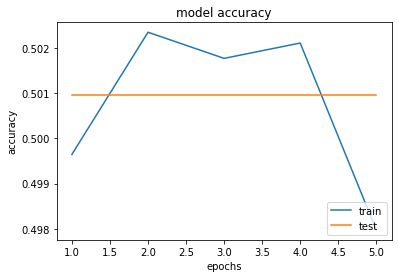

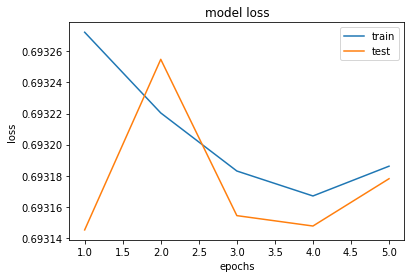

In [86]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()